In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('./MADELON/MADELON/madelon_train.data', header=None)
data

,0
0,485 477 537 479 452 471 491 476 475 473 455 50...
1,483 458 460 487 587 475 526 479 485 469 434 48...
2,487 542 499 468 448 471 442 478 480 477 468 49...
3,480 491 510 485 495 472 417 474 502 476 455 52...
4,484 502 528 489 466 481 402 478 487 468 432 49...
...,...
1995,490 505 503 474 463 461 519 476 518 467 513 48...
1996,480 475 476 480 495 482 515 479 480 484 494 45...
1997,480 517 631 470 485 474 535 476 493 466 534 46...
1998,484 481 505 478 542 477 518 477 510 472 525 48...


In [3]:
labels = pd.read_csv('./MADELON/MADELON/madelon_train.labels', header=None)
labels

,0
0,-1
1,-1
2,-1
3,1
4,1
...,...
1995,1
1996,-1
1997,-1
1998,1


In [4]:
data[0]

0       485 477 537 479 452 471 491 476 475 473 455 50...
1       483 458 460 487 587 475 526 479 485 469 434 48...
2       487 542 499 468 448 471 442 478 480 477 468 49...
3       480 491 510 485 495 472 417 474 502 476 455 52...
4       484 502 528 489 466 481 402 478 487 468 432 49...
                              ...                        
1995    490 505 503 474 463 461 519 476 518 467 513 48...
1996    480 475 476 480 495 482 515 479 480 484 494 45...
1997    480 517 631 470 485 474 535 476 493 466 534 46...
1998    484 481 505 478 542 477 518 477 510 472 525 48...
1999    474 493 469 486 521 475 494 479 481 473 462 47...
Name: 0, Length: 2000, dtype: object

In [5]:
X = []
for d in tqdm(data[0]):
    arr = list(np.fromstring(d, dtype=np.int64, sep=' '))
    X.append(arr)
X = np.array(X)
X

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 7238.17it/s]


array([[485, 477, 537, ..., 479, 475, 496],
       [483, 458, 460, ..., 492, 510, 517],
       [487, 542, 499, ..., 489, 499, 498],
       ...,
       [480, 517, 631, ..., 500, 523, 481],
       [484, 481, 505, ..., 473, 527, 485],
       [474, 493, 469, ..., 489, 516, 516]], dtype=int64)

In [15]:
X.shape

(2000, 500)

In [6]:
y = []
for d in tqdm(labels[0]):
    y.append(d)
y = np.array(y)
y

100%|█████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 1010067.19it/s]


array([-1, -1, -1, ..., -1,  1,  1])

In [7]:
def ForwardSelection(X_train, y_train, X_test, y_test):
    accuracy_array, selected = [], []
    for j in tqdm(range(len(X_train[0]))):
      index, accuracy = 0, 0
      for i in range(len(X_train[0])):
        if i not in selected:
          X_train_new, X_test_new = X_train[:,selected + [i]], X_test[:,selected + [i]]
          model = MultinomialNB()
          model.fit(X_train_new,y_train)
          model_accuracy = model.score(X_test_new,y_test)
          if model_accuracy > accuracy:
            accuracy = model_accuracy
            index = i
      selected.append(index)
      accuracy_array.append(accuracy)
    return selected, accuracy_array

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
selected, accuracy = ForwardSelection(X_train,y_train,X_test,y_test)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [10:59<00:00,  1.32s/it]


Optimum:  247


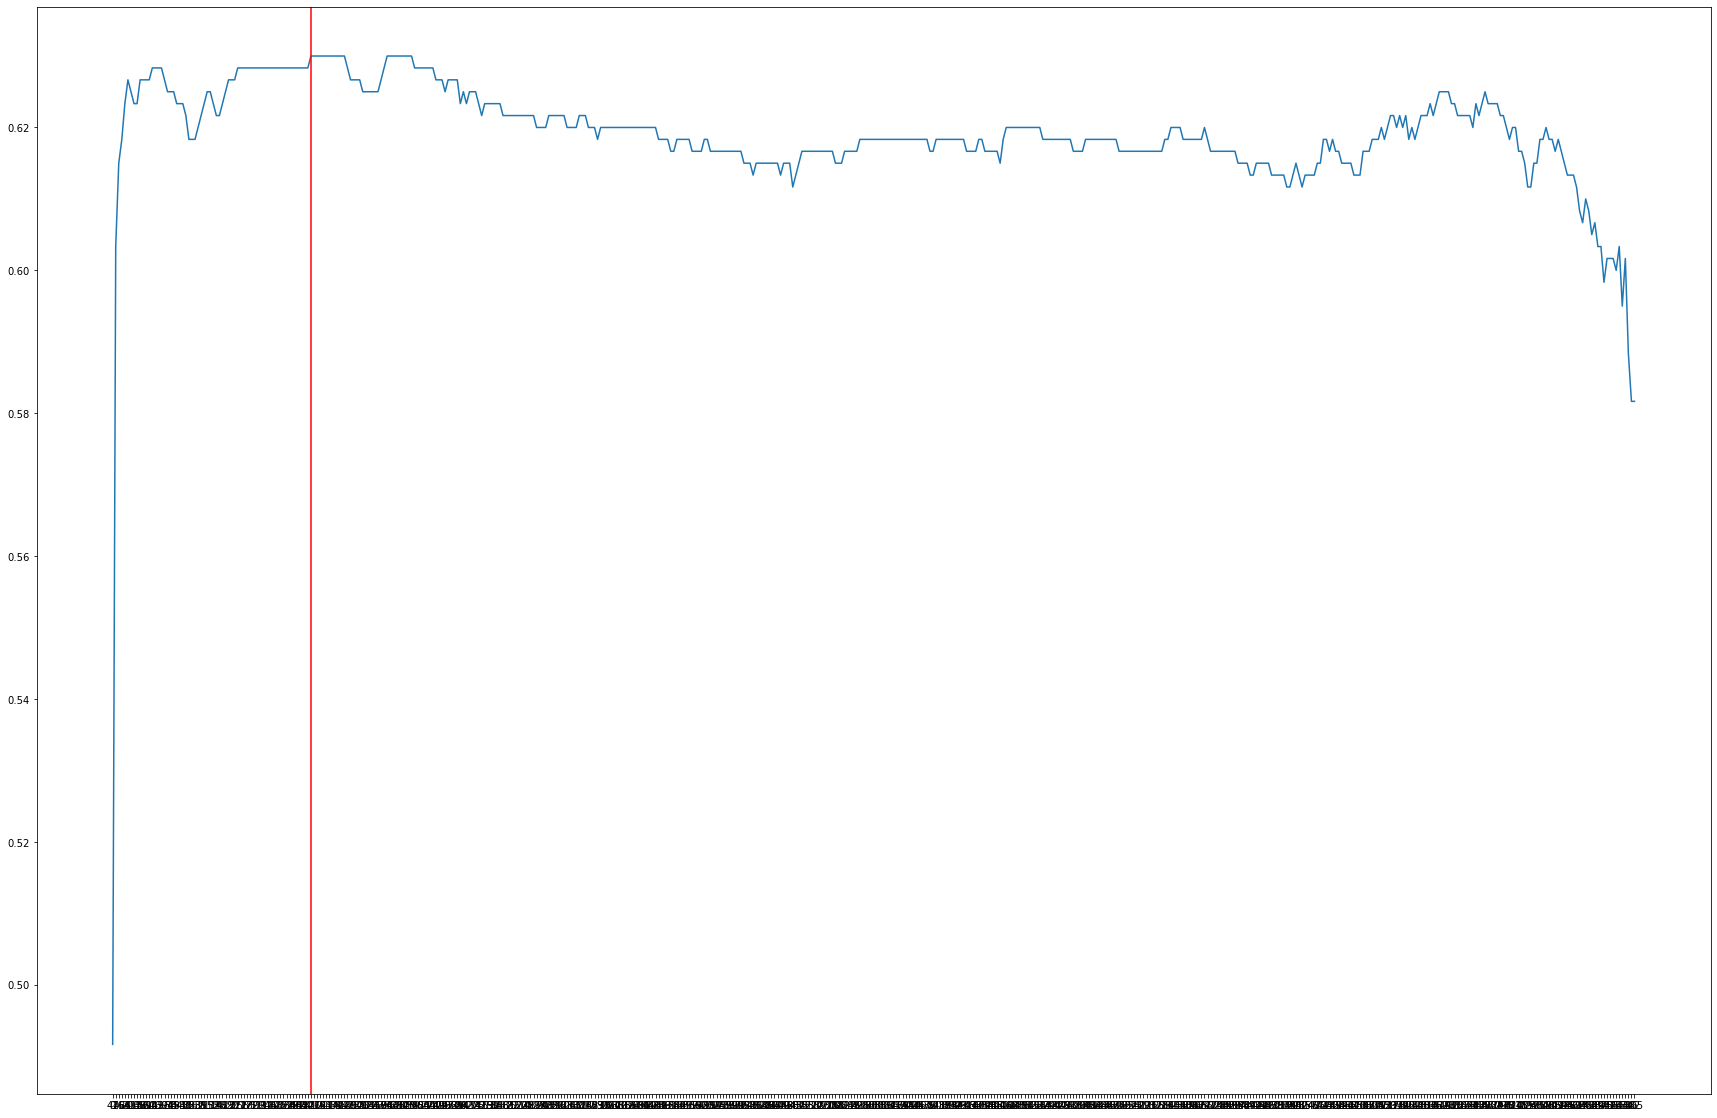

In [10]:
selected_index = [str(i) for i in selected]
opt_index = selected_index[accuracy.index(max(accuracy))]

plt.figure(figsize=(30,20))
plt.plot(selected_index, accuracy)
plt.axvline(x=opt_index, color='r', linestyle='-')
print('Optimum: ', opt_index)
plt.show()

In [16]:
def BackwardSelection(X_train, y_train, X_test, y_test):
    removed, accuracy_array = [], []
    all_index = [i for i in range(500)]
    for j in tqdm(range(len(X_train[0]))):
      index, accuracy = 0, 0
      for i in range(len(X_train[0])-1):
        if i not in removed:
          X_train_new, X_test_new = X_train[:,list(set(all_index)-set(removed + [i]))], X_test[:,list(set(all_index)-set(removed + [i]))]
          model = MultinomialNB()
          model.fit(X_train_new, y_train)
          model_accuracy = model.score(X_test_new,y_test)
          if model_accuracy > accuracy:
            accuracy = model_accuracy
            index = i
      removed.append(index)
      accuracy_array.append(accuracy)
    return removed, accuracy_array

In [17]:
removed, accuracy = BackwardSelection(X_train,y_train,X_test,y_test)
accuracy.pop()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [15:43<00:00,  1.89s/it]


0

In [19]:
accuracy

[0.5866666666666667,
 0.5883333333333334,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.59,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,
 0.5916666666666667,

Optimum:  475


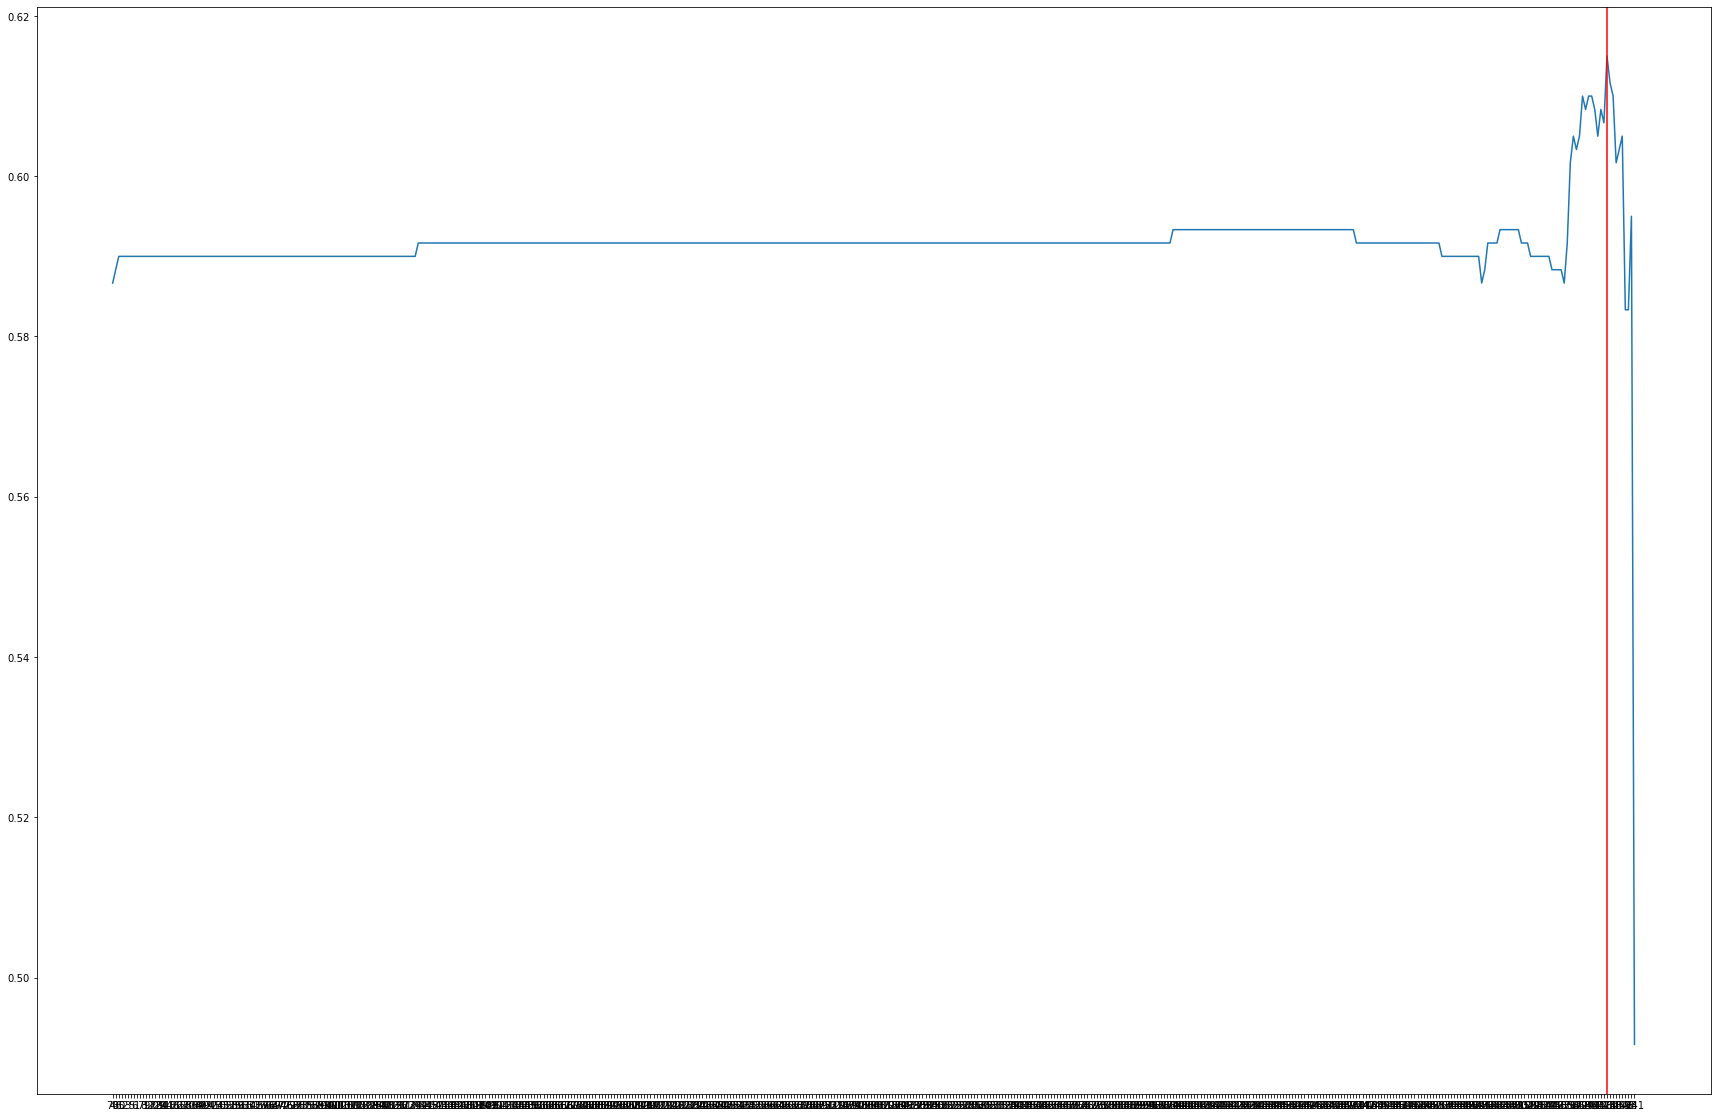

In [22]:
removed_index = [str(i) for i in removed]
opt_index = removed_index[accuracy.index(max(accuracy))]

removed_index.pop()
plt.figure(figsize=(30,20))
plt.plot(removed_index, accuracy)
print('Optimum: ', opt_index)
plt.axvline(x=opt_index, color='r', linestyle='-')
plt.show()